<a href="https://colab.research.google.com/github/Raghav-Senthilkumar/COX-2-drug-prediction-/blob/main/DrugLikeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2023-08-16 16:56:07--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   167MB/s    in 0.5s    

2023-08-16 16:56:07 (167 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("COX-2_data.csv")
df.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00


In [ ]:
bioactivity = []
for i in df.standard_value:
  if float(i) >= 10000:
    bioactivity.append("inactive")
  elif float(i) <= 1000:
    bioactivity.append("active")
  else:
    bioactivity.append("intermediate")

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00
...,...,...,...
6497,CHEMBL4758581,Cc1c(Nc2ccc(S(=O)(=O)N3CCN(C)CC3)cc2F)nc2ccc(N...,0.80
6498,CHEMBL5220891,C[C@H](C(=O)OC(Cn1ccnc1)c1ccc(F)cc1)c1ccc(-c2c...,3760.00
6499,CHEMBL5219013,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1)c1...,2290.00
6500,CHEMBL5219227,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1Cl)...,1930.00


In [ ]:
len(bioactivity)

6502

In [ ]:
df["bioactivity"] = bioactivity
df.isnull().any()


molecule_chembl_id    False
canonical_smiles      False
standard_value        False
bioactivity           False
dtype: bool

In [ ]:
df = df[df.standard_value != 0]

In [ ]:
pip install rdkit

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, QED

Lipinski's rule of five (i.e., a molecule with a molecular mass less than 500 Da, no more than 5 hydrogen bond donors, no more than 10 hydrogen bond acceptors, and an octanol–water partition coefficient log P not greater than 5).

In [ ]:
molecule = []
for i in df['canonical_smiles']:
  mol = Chem.MolFromSmiles(i)
  molecule.append(mol)

In [ ]:
molmass = []
hdonors = []
hacceptors = []
oct_watercoef = []

In [ ]:
len(molecule)

6495

In [ ]:
for i in molecule:
  molmass.append(Descriptors.MolWt(i))
  oct_watercoef.append(Descriptors.MolLogP(i))
  hacceptors.append(Lipinski.NumHAcceptors(i))
  hdonors.append(Lipinski.NumHDonors(i))

In [ ]:
len(hdonors)

6495

In [ ]:
df['Number of H donors'] = hdonors
df["Number of H Acceptors"] = hacceptors
df['LogP'] = oct_watercoef
df['molecular mass'] = molmass

<ipython-input-18-26dbc7f1218d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of H donors'] = hdonors
<ipython-input-18-26dbc7f1218d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Number of H Acceptors"] = hacceptors
<ipython-input-18-26dbc7f1218d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
violations = []
temp = 0

In [ ]:
for i in range(0, len(hdonors)):
  if hdonors[i] > 5:
    temp+=1
  if hacceptors[i] >10:
    temp+=1
  if molmass[i]>500:
    temp+=1
  if oct_watercoef[i]>5:
    temp+=1
  violations.append(temp)
  temp =0


In [ ]:
df['Ro5violations'] = violations

<ipython-input-21-f1db994127ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ro5violations'] = violations


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity,Number of H donors,Number of H Acceptors,LogP,molecular mass,Ro5violations
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.00,active,0,3,3.85622,311.406,0
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.00,intermediate,0,4,3.80782,357.406,0
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.00,active,0,4,6.22772,469.965,1
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12,active,1,0,6.38170,335.397,1
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive,0,3,4.24930,343.423,0
...,...,...,...,...,...,...,...,...,...
6497,CHEMBL4758581,Cc1c(Nc2ccc(S(=O)(=O)N3CCN(C)CC3)cc2F)nc2ccc(N...,0.80,active,2,10,3.09672,552.636,1
6498,CHEMBL5220891,C[C@H](C(=O)OC(Cn1ccnc1)c1ccc(F)cc1)c1ccc(-c2c...,3760.00,intermediate,0,4,5.91650,432.470,1
6499,CHEMBL5219013,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1)c1...,2290.00,intermediate,1,4,5.49250,491.994,1
6500,CHEMBL5219227,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1Cl)...,1930.00,intermediate,1,5,5.57080,536.459,2


In [ ]:
normalized = []
for i in df['standard_value']:
  if i > 100000000:
    i = 100000000
  normalized.append(i)

In [ ]:
pIC50 = []
for i in normalized:
  molar = i*(10**-9) # Converts nM to M
  pIC50.append(-np.log10(molar))


In [ ]:
df.insert(2, 'pIC50', pIC50)

In [ ]:
df.pIC50.describe()

count    6495.000000
mean        5.927086
std         1.423499
min         1.000000
25%         5.000000
50%         5.974694
75%         6.958607
max        11.221994
Name: pIC50, dtype: float64

In [ ]:
df.isnull().any()

molecule_chembl_id       False
canonical_smiles         False
pIC50                    False
standard_value           False
bioactivity              False
Number of H donors       False
Number of H Acceptors    False
LogP                     False
molecular mass           False
Ro5violations            False
dtype: bool

In [ ]:
np.isinf(df['pIC50']).values.sum()

0

In [ ]:
df.Ro5violations.describe()

count    6495.00000
mean        0.25943
std         0.55327
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         4.00000
Name: Ro5violations, dtype: float64

In [ ]:
df.head()

,molecule_chembl_id,canonical_smiles,pIC50,standard_value,bioactivity,Number of H donors,Number of H Acceptors,LogP,molecular mass,Ro5violations
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,7.221849,60.00,active,0,3,3.85622,311.406,0
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,5.490797,3230.00,intermediate,0,4,3.80782,357.406,0
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,7.096910,80.00,active,0,4,6.22772,469.965,1
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,9.920819,0.12,active,1,0,6.38170,335.397,1
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,4.000000,100000.00,inactive,0,3,4.24930,343.423,0


In [ ]:
df = df.drop(['standard_value'], axis=1)

In [ ]:
Ro5passorfail = []
for i in df['Ro5violations']:
  if i >1:
    Ro5passorfail.append("Fail")
  else:
    Ro5passorfail.append("Pass")


In [ ]:
df['Ro5Rule'] = Ro5passorfail
df

,molecule_chembl_id,canonical_smiles,pIC50,bioactivity,Number of H donors,Number of H Acceptors,LogP,molecular mass,Ro5violations,Ro5Rule
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,7.221849,active,0,3,3.85622,311.406,0,Pass
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,5.490797,intermediate,0,4,3.80782,357.406,0,Pass
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,7.096910,active,0,4,6.22772,469.965,1,Pass
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,9.920819,active,1,0,6.38170,335.397,1,Pass
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,4.000000,inactive,0,3,4.24930,343.423,0,Pass
...,...,...,...,...,...,...,...,...,...,...
6497,CHEMBL4758581,Cc1c(Nc2ccc(S(=O)(=O)N3CCN(C)CC3)cc2F)nc2ccc(N...,9.096910,active,2,10,3.09672,552.636,1,Pass
6498,CHEMBL5220891,C[C@H](C(=O)OC(Cn1ccnc1)c1ccc(F)cc1)c1ccc(-c2c...,5.424812,intermediate,0,4,5.91650,432.470,1,Pass
6499,CHEMBL5219013,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1)c1...,5.640165,intermediate,1,4,5.49250,491.994,1,Pass
6500,CHEMBL5219227,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1Cl)...,5.714443,intermediate,1,5,5.57080,536.459,2,Fail


In [ ]:
k = 0
for i in range(0,len(violations)):
  if violations[i] >1:
    k+=1
print("Number of Violations to Ro5 drug-likeness: "+ str(k))

Number of Violations to Ro5 drug-likeness: 276


In [ ]:
Qednum = []
for i in molecule:
 Qednum.append(QED.default(i))

In [ ]:
qeddescrip = []
for i in molecule:
  qeddescrip.append(QED.properties(i))

In [ ]:
qeddescrip[1]

QEDproperties(MW=357.40600000000006, ALOGP=3.807820000000002, HBA=3, HBD=0, PSA=56.14, ROTB=4, AROM=3, ALERTS=1)

In [ ]:
PSA = []
for i in qeddescrip:
  PSA.append(i[4])

In [ ]:
numrotbonds = []
for i in molecule:
  numrotbonds.append(Lipinski.NumRotatableBonds(i))

In [ ]:
veberporf = []
for i in range(0,len(PSA)):
  if PSA[i] >140 or numrotbonds[i]>10:
    veberporf.append('fail')
  else:
    veberporf.append('pass')

In [ ]:
len(veberporf)

6495

In [ ]:
df['PSA'] = PSA
df['numrotbonds'] = numrotbonds
df["Verber Rule P or F"] = veberporf


In [ ]:
df["QED"] = Qednum

In [ ]:
df

,molecule_chembl_id,canonical_smiles,pIC50,bioactivity,Number of H donors,Number of H Acceptors,LogP,molecular mass,Ro5violations,Ro5Rule,PSA,numrotbonds,Verber Rule P or F,QED
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,7.221849,active,0,3,3.85622,311.406,0,Pass,39.07,3,pass,0.736620
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,5.490797,intermediate,0,4,3.80782,357.406,0,Pass,56.14,4,pass,0.667384
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,7.096910,active,0,4,6.22772,469.965,1,Pass,48.30,6,pass,0.336163
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,9.920819,active,1,0,6.38170,335.397,1,Pass,15.79,2,pass,0.558954
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,4.000000,inactive,0,3,4.24930,343.423,0,Pass,39.07,4,pass,0.710290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,CHEMBL4758581,Cc1c(Nc2ccc(S(=O)(=O)N3CCN(C)CC3)cc2F)nc2ccc(N...,9.096910,active,2,10,3.09672,552.636,1,Pass,116.87,7,pass,0.359397
6498,CHEMBL5220891,C[C@H](C(=O)OC(Cn1ccnc1)c1ccc(F)cc1)c1ccc(-c2c...,5.424812,intermediate,0,4,5.91650,432.470,1,Pass,44.12,7,pass,0.340804
6499,CHEMBL5219013,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1)c1...,5.640165,intermediate,1,4,5.49250,491.994,1,Pass,58.36,8,pass,0.354220
6500,CHEMBL5219227,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1Cl)...,5.714443,intermediate,1,5,5.57080,536.459,2,Fail,75.43,9,pass,0.284019


In [ ]:
df.describe()

,pIC50,Number of H donors,Number of H Acceptors,LogP,molecular mass,Ro5violations,PSA,numrotbonds,QED
count,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.00000,6495.000000,6495.000000,6495.000000
mean,5.927086,1.041416,4.734103,3.867435,388.083793,0.25943,74.773678,4.602156,0.625423
std,1.423499,1.610706,2.849629,1.554756,113.170467,0.55327,43.632770,2.689849,0.197021
min,1.000000,0.000000,0.000000,-11.954000,108.144000,0.00000,0.000000,0.000000,0.013446
25%,5.000000,0.000000,3.000000,3.095960,337.219000,0.00000,55.120000,3.000000,0.511727
50%,5.974694,1.000000,4.000000,3.854800,381.379000,0.00000,69.670000,4.000000,0.671098
75%,6.958607,1.000000,5.000000,4.624600,421.495500,0.00000,86.105000,5.000000,0.767807
max,11.221994,31.000000,57.000000,13.313000,2324.383000,4.00000,882.790000,33.000000,0.942618


In [ ]:
 inactive = df[df.bioactivity== 'inactive']
active = df[df.bioactivity== 'active']

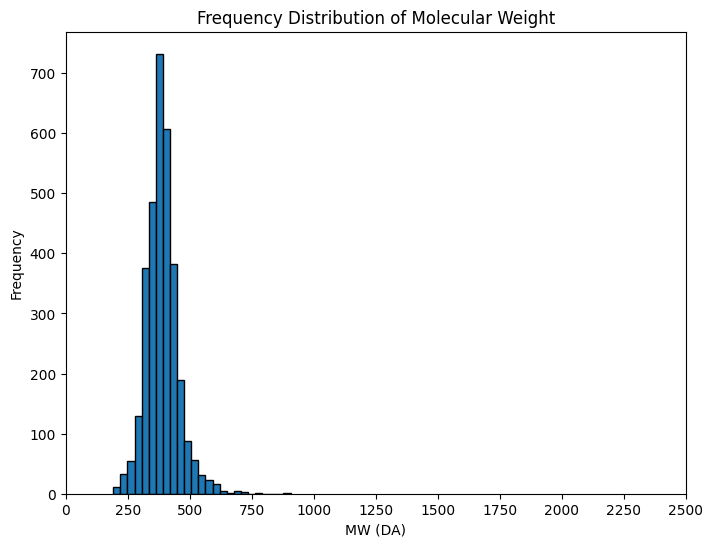

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Frequency Distribution of Molecular Weight')
plt.hist( active['molecular mass'],bins =25,ec="black")
plt.xlabel('MW (DA)')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 250,500,750,1000,1250,1500,1750,2000,2250,2500])
plt.show()

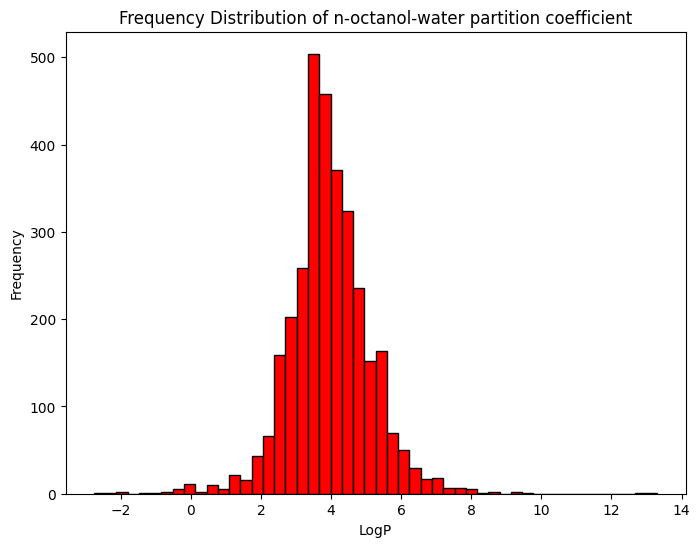

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Frequency Distribution of n-octanol-water partition coefficient')
plt.hist( active['LogP'],bins =50,color = "red", ec="black")
plt.xlabel('LogP')
plt.ylabel('Frequency')
plt.show()

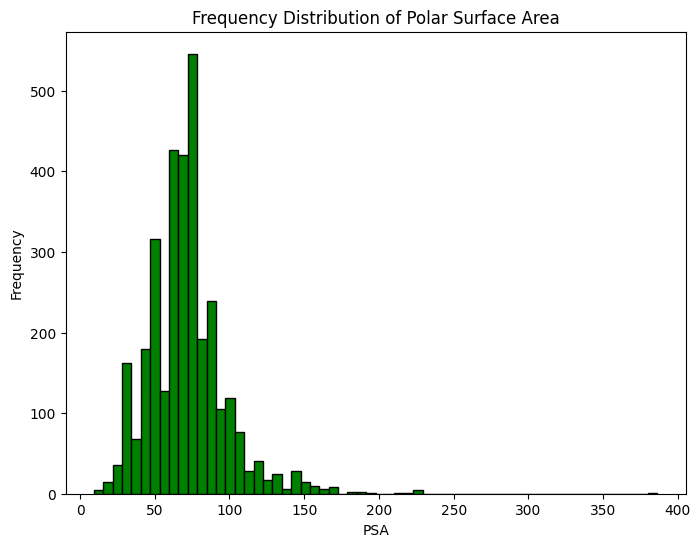

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Frequency Distribution of Polar Surface Area')
plt.hist( active['PSA'],bins =60,color = "green", ec="black")
plt.xlabel('PSA')
plt.ylabel('Frequency')
plt.show()

In [ ]:
inactive.describe()

,pIC50,Number of H donors,Number of H Acceptors,LogP,molecular mass,Ro5violations,PSA,numrotbonds,QED
count,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000
mean,4.220473,1.263557,4.683839,3.868085,381.668977,0.328633,74.224490,4.830260,0.607131
std,0.738475,1.734072,2.783632,1.869370,120.784990,0.623664,43.708215,2.998632,0.205547
min,1.000000,0.000000,0.000000,-8.432700,125.149000,0.000000,0.000000,0.000000,0.028826
25%,4.000000,0.000000,3.000000,2.868230,316.378000,0.000000,51.960000,3.000000,0.466206
50%,4.301030,1.000000,4.000000,3.848210,371.509500,0.000000,68.010000,4.000000,0.650730
75%,4.744727,2.000000,6.000000,4.860975,421.444000,1.000000,86.782500,6.000000,0.767049
max,5.000000,23.000000,40.000000,13.028900,1677.788000,4.000000,630.040000,25.000000,0.941341


In [ ]:
active.describe()

,pIC50,Number of H donors,Number of H Acceptors,LogP,molecular mass,Ro5violations,PSA,numrotbonds,QED
count,3227.000000,3227.000000,3227.000000,3227.000000,3227.000000,3227.000000,3227.000000,3227.000000,3227.000000
mean,7.085511,0.823675,4.553765,3.951514,388.354187,0.209792,71.815482,4.316083,0.644680
std,0.805132,0.813073,1.845003,1.176359,64.981462,0.476012,26.022235,2.164327,0.182294
min,6.000000,0.000000,0.000000,-2.765300,192.214000,0.000000,9.230000,0.000000,0.050437
25%,6.443697,0.000000,3.000000,3.343150,350.441500,0.000000,55.090000,3.000000,0.559119
50%,6.982967,1.000000,4.000000,3.913500,381.379000,0.000000,70.180000,4.000000,0.685560
75%,7.585027,1.000000,5.000000,4.582550,419.528000,0.000000,81.540000,5.000000,0.767807
max,11.221994,10.000000,23.000000,13.313000,906.667000,3.000000,386.400000,25.000000,0.942107


In [ ]:
pIC50inactive = inactive['pIC50']
pIC50active = active['pIC50']
Mwinactive = inactive['molecular mass']
Mwactive = active['molecular mass']
LogPinactive = inactive['LogP']
LogPactive = active['LogP']
PSAinactive = inactive['PSA']
PSAactive = active['PSA']
hdonorsactive = active["Number of H donors"]
hdonorsinactive = inactive["Number of H donors"]
hacceptorsactive = active["Number of H Acceptors"]
hacceptorsinactive = inactive["Number of H Acceptors"]
numrotinactive = inactive["numrotbonds"]
numrotactive =active["numrotbonds"]
Qedactive = active["QED"]
Qedinactive = inactive["QED"]

In [ ]:
from scipy.stats import ks_2samp
import numpy as np
print("pIC50:" + str(ks_2samp(pIC50inactive, pIC50active)[1]))
print("Molecular Weight:" + str(ks_2samp(Mwinactive, Mwactive)[1]))
print("LogP:" + str(ks_2samp(LogPinactive, LogPactive)[1]))
print("PSA:" + str(ks_2samp(PSAinactive, PSAactive)[1]))
print("Hdonors:" + str(ks_2samp(hdonorsinactive , hdonorsactive)[1]))
print("Hacceptors:" + str(ks_2samp(hacceptorsactive, hacceptorsinactive)[1]))
print("numofrotatablebonds:" + str(ks_2samp(numrotinactive, numrotactive)[1]))
print("QED:" + str(ks_2samp(Qedinactive, Qedactive)[1]))

pIC50:0.0
Molecular Weight:3.285699416566338e-22
LogP:5.293102483435811e-16
PSA:2.946940478584909e-10
Hdonors:5.501305068049295e-24
Hacceptors:0.0009131648168733764
numofrotatablebonds:1.295894539780874e-13
QED:1.694600506499673e-15


In [ ]:
df.to_csv('COX-2_druglikeness.csv', index=False)

In [ ]:
df2 = df[df.bioactivity != 'intermediate']

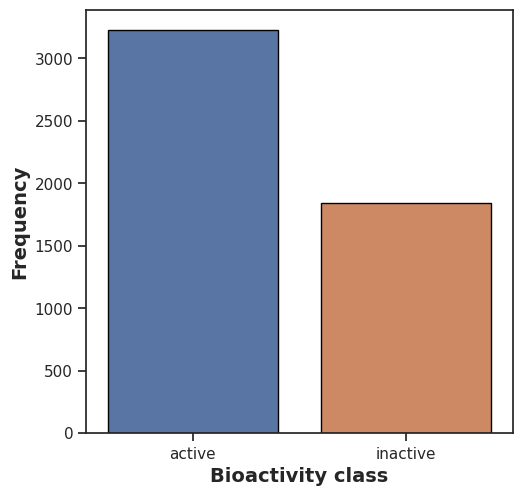

In [ ]:

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity', data=df2, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')
